Laboratorio | Limpieza básica de datos y EDA.

Para este laboratorio, utilizaremos el conjunto de datos del caso de negocio de análisis de clientes. Este conjunto de datos se puede encontrar en la files_for_labcarpeta.

Contexto
Una compañía de seguros de automóviles ha recopilado algunos datos sobre sus clientes, incluidos sus datos demográficos , educación , empleo , detalles de la póliza , información del vehículo sobre el que se aplica la póliza y montos de las reclamaciones . Ayudará a la alta gerencia con algunas preguntas comerciales que deberían ayudarlos a comprender mejor a sus clientes, mejorar sus servicios y mejorar la rentabilidad.

Algunos objetivos comerciales para el caso de estudio podrían ser :

Retener clientes,
Analizar datos relevantes de los clientes,
Desarrollar programas enfocados en retención de clientes.
Con base en el análisis, tome acciones específicas para aumentar la respuesta, la retención y el crecimiento rentables de los clientes.

In [2]:
import pandas as pd

In [7]:
customer_df = pd.read_csv(r"C:\Users\usuario\Desktop\Bootcamp-Ironhack\Ejercicios Clase\Semana 9 (30.04)\Dia 3 (Unidad 4)\we_fn_use_c_marketing_customer_value_analysis.csv")

In [8]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
# Mostrar las primeras 5 filas del DataFrame
print(customer_df.head())

# Mostrar la forma del DataFrame (número de filas y columnas)
print(customer_df.shape)

# Mostrar información general del DataFrame
print(customer_df.info())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [10]:
# Renombrar las columnas a snake_case
customer_df.columns = [
    'customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
    'education', 'effective_to_date', 'employment_status', 'gender', 'income',
    'location_code', 'marital_status', 'monthly_premium_auto',
    'months_since_last_claim', 'months_since_policy_inception',
    'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy',
    'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class',
    'vehicle_size'
]

# Verificar el cambio
print(customer_df.head())
print(customer_df.columns)

  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0           2/24/11          Employed      F   56274  ...   
1           1/31/11        Unemployed      F       0  ...   
2           2/19/11          Employed      F   48767  ...   
3           1/20/11        Unemployed      M       0  ...   
4            2/3/11          Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0              

In [13]:
# Convertir 'effective_to_date' a formato de fecha y hora
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Identificar columnas categóricas basadas en la inspección de datos
categorical_columns = [
    'customer', 'state', 'response', 'coverage', 'education', 'employment_status',
    'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
    'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'
]
# Convertir las columnas identificadas a tipo 'category'
for column in categorical_columns:
    customer_df[column] = customer_df[column].astype('category')

# Identificar columnas numéricas
numeric_columns = customer_df.select_dtypes(include=['number']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = customer_df.select_dtypes(include=['category']).columns.tolist()

# Imprimir las columnas categóricas y numéricas
print("Columnas categóricas:", categorical_columns)
print("Columnas numéricas:", numeric_columns)

Columnas categóricas: ['customer', 'state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']
Columnas numéricas: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

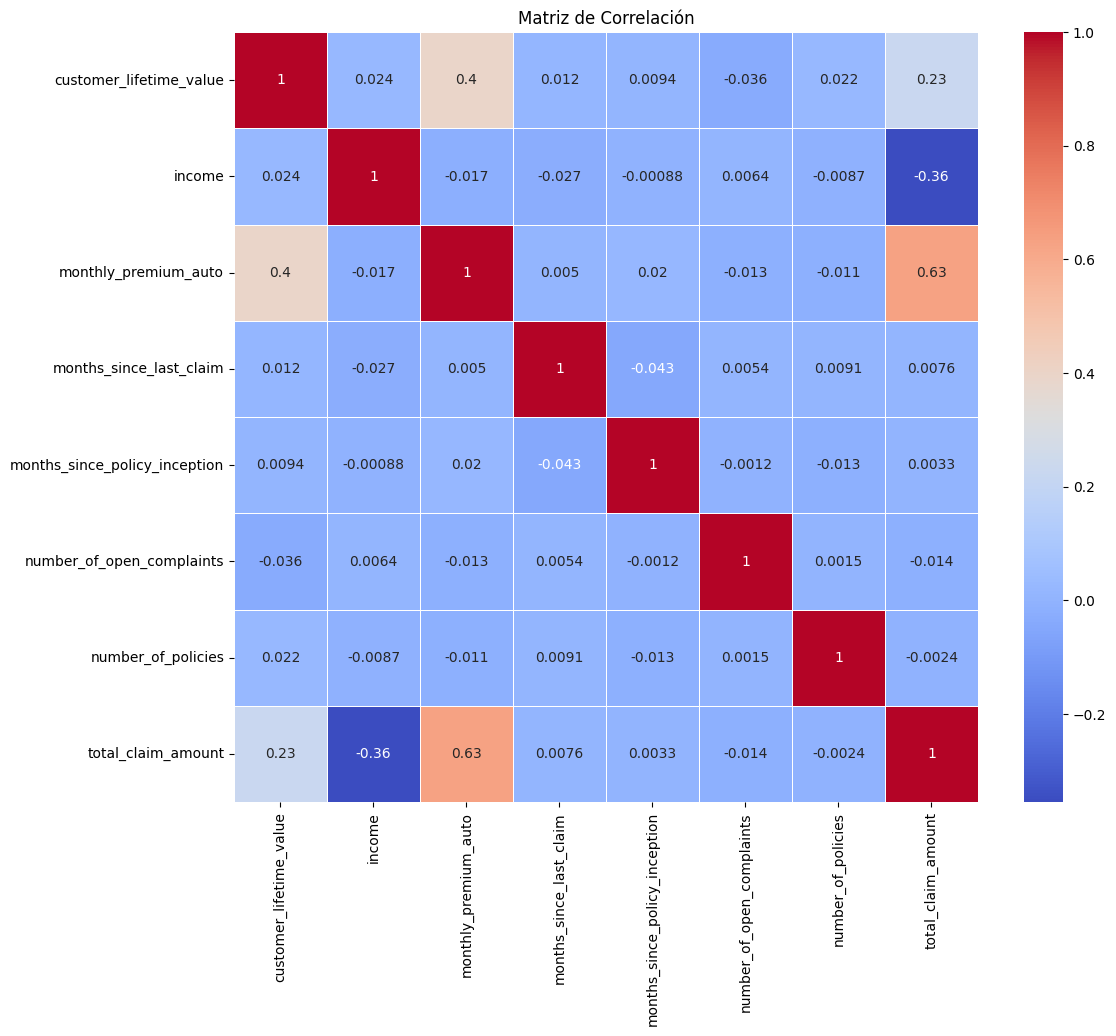

In [15]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_columns = customer_df.select_dtypes(include=['number']).columns
df_numeric = customer_df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Dibujar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Observaciones:

Al ejecutar el código anterior, verás una matriz de correlación que muestra cómo se correlacionan las variables numéricas entre sí. Aquí hay algunas cosas a observar:

Correlaciones fuertes: Busca pares de variables con valores de correlación cercanos a 1 o -1, lo que indica una fuerte relación positiva o negativa, respectivamente. Por ejemplo:

Una alta correlación positiva (cercana a 1) podría observarse entre variables como monthly_premium_auto y total_claim_amount.
Una alta correlación negativa (cercana a -1) es menos común pero puede indicar que una variable disminuye cuando la otra aumenta.
Correlaciones débiles: Valores de correlación cercanos a 0 indican una relación débil o inexistente entre las variables. La mayoría de las variables en conjuntos de datos reales tienden a tener correlaciones débiles entre sí.

Análisis de las correlaciones:

Si customer_lifetime_value está altamente correlacionado con otras variables, puede ser interesante para estrategias de retención de clientes.
Correlaciones entre months_since_last_claim y total_claim_amount pueden indicar patrones en los reclamos.
Insight de negocio: Las correlaciones pueden ayudar a identificar qué variables influyen más en los resultados deseados, como la retención de clientes o la cantidad de reclamos, permitiendo a la compañía de seguros diseñar mejores estrategias.

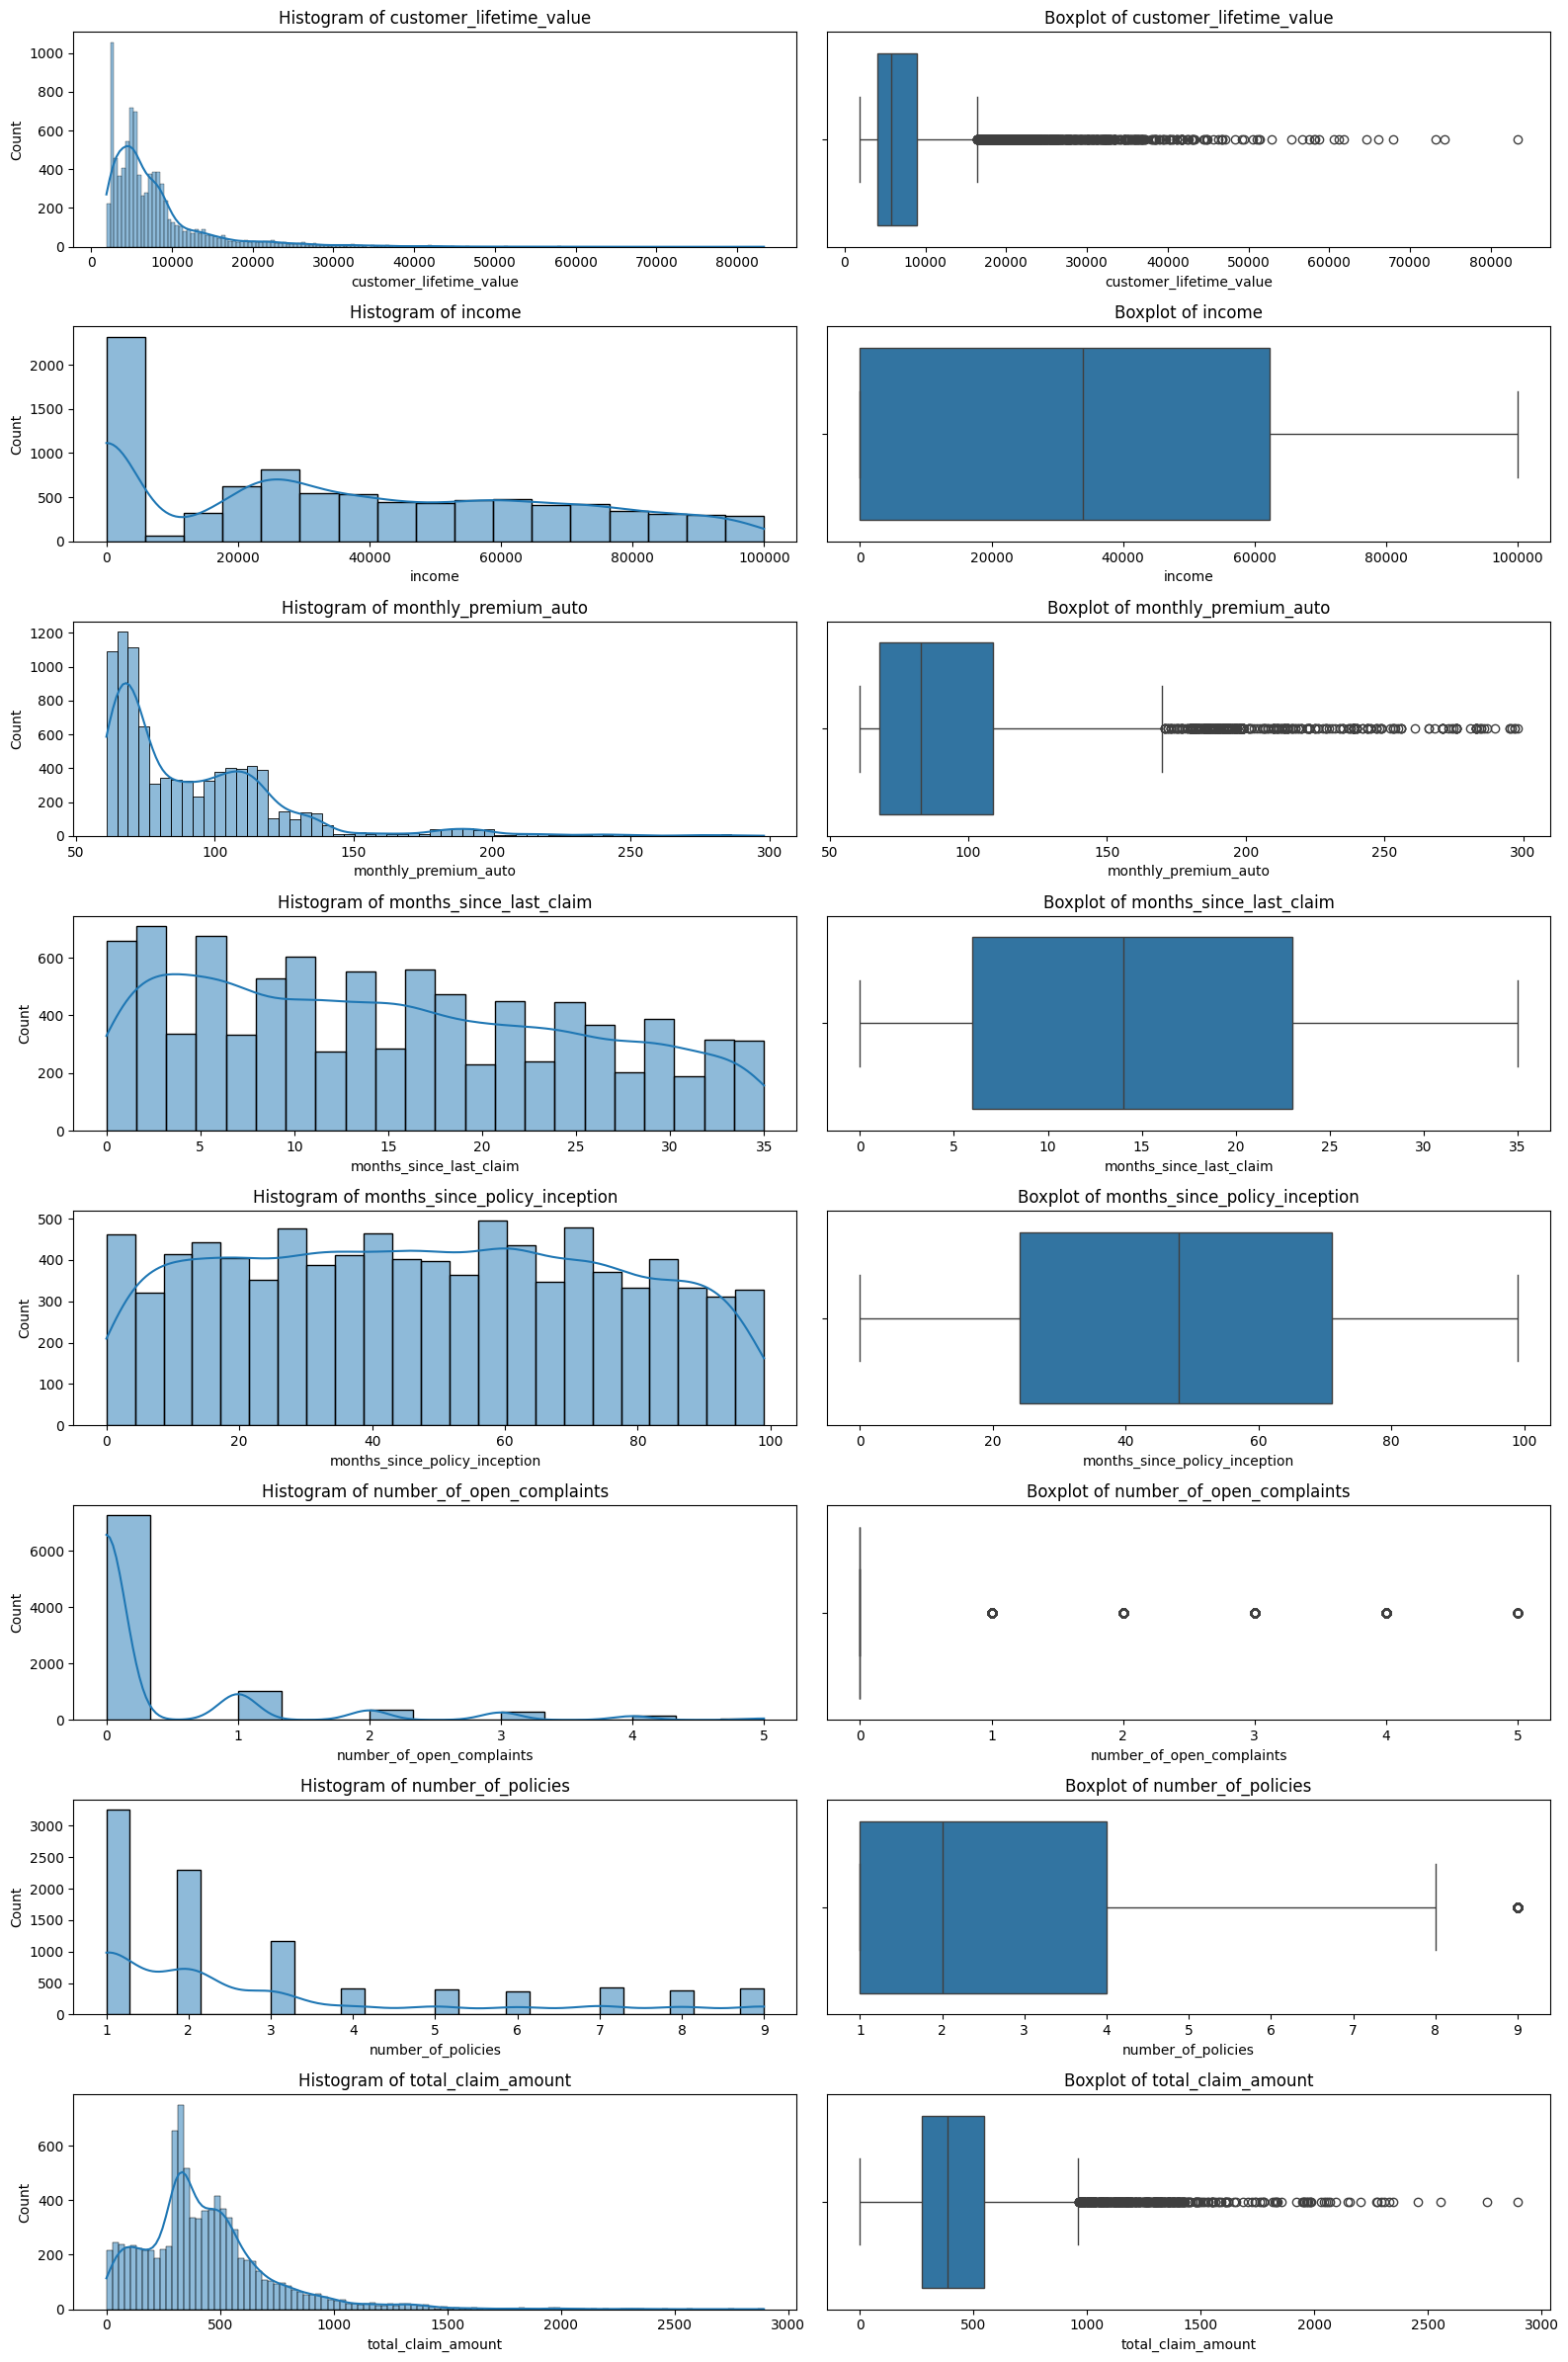

In [16]:
# Seleccionar solo las columnas numéricas
numeric_columns = customer_df.select_dtypes(include=['number']).columns

# Graficar cada variable continua
plt.figure(figsize=(16, 24))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i*2-1)
    sns.histplot(customer_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(len(numeric_columns), 2, i*2)
    sns.boxplot(x=customer_df[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

Observaciones:

Aquí hay algunas observaciones generales que puedes hacer al analizar estos gráficos:

Customer Lifetime Value:

Histograma: Puede mostrar una distribución sesgada a la derecha, indicando que la mayoría de los clientes tienen un valor de vida bajo, pero hay algunos con valores significativamente altos.
Boxplot: Puede mostrar la presencia de valores atípicos (outliers) en el extremo superior.
Income:

Histograma: Puede mostrar una distribución bimodal o sesgada a la derecha, dependiendo del ingreso de los clientes.
Boxplot: Puede mostrar rangos de ingresos y posibles valores atípicos en los ingresos altos.
Monthly Premium Auto:

Histograma: Puede mostrar cómo se distribuyen las primas mensuales de los autos, a menudo con una concentración en ciertos valores.
Boxplot: Puede resaltar valores atípicos en las primas mensuales más altas.
Months Since Last Claim:

Histograma: Puede mostrar una distribución uniforme si los reclamos están distribuidos de manera equitativa en el tiempo.
Boxplot: Puede mostrar la variabilidad en el tiempo desde el último reclamo y cualquier valor extremo.
Months Since Policy Inception:

Histograma: Puede mostrar cómo los clientes se distribuyen según el tiempo desde que iniciaron su póliza.
Boxplot: Puede mostrar la variedad de tiempos de inicio de pólizas y destacar valores extremos.
Number of Open Complaints:

Histograma: Puede mostrar que la mayoría de los clientes tienen cero o muy pocas quejas abiertas.
Boxplot: Puede enfatizar los clientes con un número atípicamente alto de quejas abiertas.
Number of Policies:

Histograma: Puede mostrar cómo se distribuyen los números de políticas entre los clientes, posiblemente con una moda baja.
Boxplot: Puede destacar clientes con un número atípicamente alto de políticas.
Total Claim Amount:

Histograma: Puede mostrar una distribución sesgada a la derecha si algunos reclamos son mucho más altos que otros.
Boxplot: Puede resaltar valores atípicos en las cantidades totales de reclamos.